In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm


from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'dejavuserif' 

In [39]:
#функция мнк

def lsf(x, y, functional=True):
    x_avg = np.average(x)
    y_avg = np.average(y)
    xy_avg = np.average(x * y)
    x2_avg = np.average(np.square(x))
    y2_avg = np.average(np.square(y))
    count = len(x)
    
    print('x=', x_avg, 'y=', y_avg)
    print('x2=', x2_avg, 'y2=', y2_avg, 'xy=', xy_avg)
    
    b = (xy_avg - x_avg * y_avg) / (x2_avg - x_avg ** 2)
    b_error = ((y2_avg - y_avg ** 2)/(x2_avg - x_avg ** 2) - b ** 2) ** 0.5 / count ** 0.5
    a = y_avg - b * x_avg
    a_error = b_error * (x2_avg - x_avg ** 2) ** 0.5
    
    if functional:
        f = lambda x: b * x + a
        return f, (b, a, b_error, a_error)
    
    return b, a, b_error, a_error

In [40]:
rcParams['figure.figsize'] = (10, 7)
rcParams['figure.dpi'] = 300
rcParams['axes.grid'] = True
rcParams['font.size'] = 14
# rcParams

In [52]:
with open("data.csv") as afc:
    data = pd.read_csv(afc)
    
data['I_a'] *= 0.05
data['P'] *= 0.5

In [96]:
np.round(data.T.iloc[[0, 6, 7], :], 3)

print('$x$, мм', *['{:.0f}'.format(x) for x in data.T.iloc[0, 0:10]], sep=' & ', end=r' \\\hline')
print()
print('$r_L$, Ом', *['{:.1f}'.format(x) for x in data.T.iloc[6, 0:10]], sep=' & ', end=r' \\\hline')
print()
print('$L$, Гн', *['{:.2f}'.format(x) for x in data.T.iloc[7, 0:10]], sep=' & ', end=r' \\\hline')
print()
print('$x$, мм', *['{:.0f}'.format(x) for x in data.T.iloc[0, 10:20]], sep=' & ', end=r' \\\hline')
print()
print('$r_L$, Ом', *['{:.1f}'.format(x) for x in data.T.iloc[6, 10:20]], sep=' & ', end=r' \\\hline')
print()
print('$L$, Гн', *['{:.2f}'.format(x) for x in data.T.iloc[7, 10:20]], sep=' & ', end=r' \\\hline')

$x$, мм & 5 & 7 & 9 & 11 & 13 & 15 & 17 & 19 & 21 & 23 \\\hline
$r_L$, Ом & 22.2 & 16.3 & 12.3 & 10.7 & 9.8 & 8.3 & 7.6 & 7.0 & 6.8 & 6.4 \\\hline
$L$, Гн & 0.31 & 0.26 & 0.23 & 0.21 & 0.20 & 0.18 & 0.17 & 0.15 & 0.15 & 0.14 \\\hline
$x$, мм & 25 & 27 & 29 & 31 & 33 & 35 & 37 & 39 & 41 \\\hline
$r_L$, Ом & 6.0 & 6.0 & 5.6 & 5.6 & 5.3 & 5.3 & 5.1 & 5.1 & 4.6 \\\hline
$L$, Гн & 0.14 & 0.13 & 0.13 & 0.12 & 0.12 & 0.12 & 0.11 & 0.11 & 0.11 \\\hline

In [54]:
data['r'] = data['P'] / data['I_a'] ** 2
data['L'] = 1 / (100 * np.pi) * np.sqrt((data['U_L'] / data['I_a']) ** 2 - data['r'] ** 2)

In [81]:
data



,"x, mm",I_a,U_r,U_r+L,U_L,P,r,L
0,5,1.05,45,125,106,24.5,22.222222,0.313459
1,7,1.20,52,124,101,23.5,16.319444,0.262827
2,9,1.35,57,123,97,22.5,12.345679,0.225310
3,11,1.40,61,121,93,21.0,10.714286,0.208680
4,13,1.45,63,120,90,20.5,9.750297,0.195119
5,15,1.55,66,119,87,20.0,8.324662,0.176688
6,17,1.60,69,119,84,19.5,7.617187,0.165344
7,19,1.65,71,118,81,19.0,6.978880,0.154674
8,21,1.65,73,117,79,18.5,6.795225,0.150860
9,23,1.70,74,116,77,18.5,6.401384,0.142729


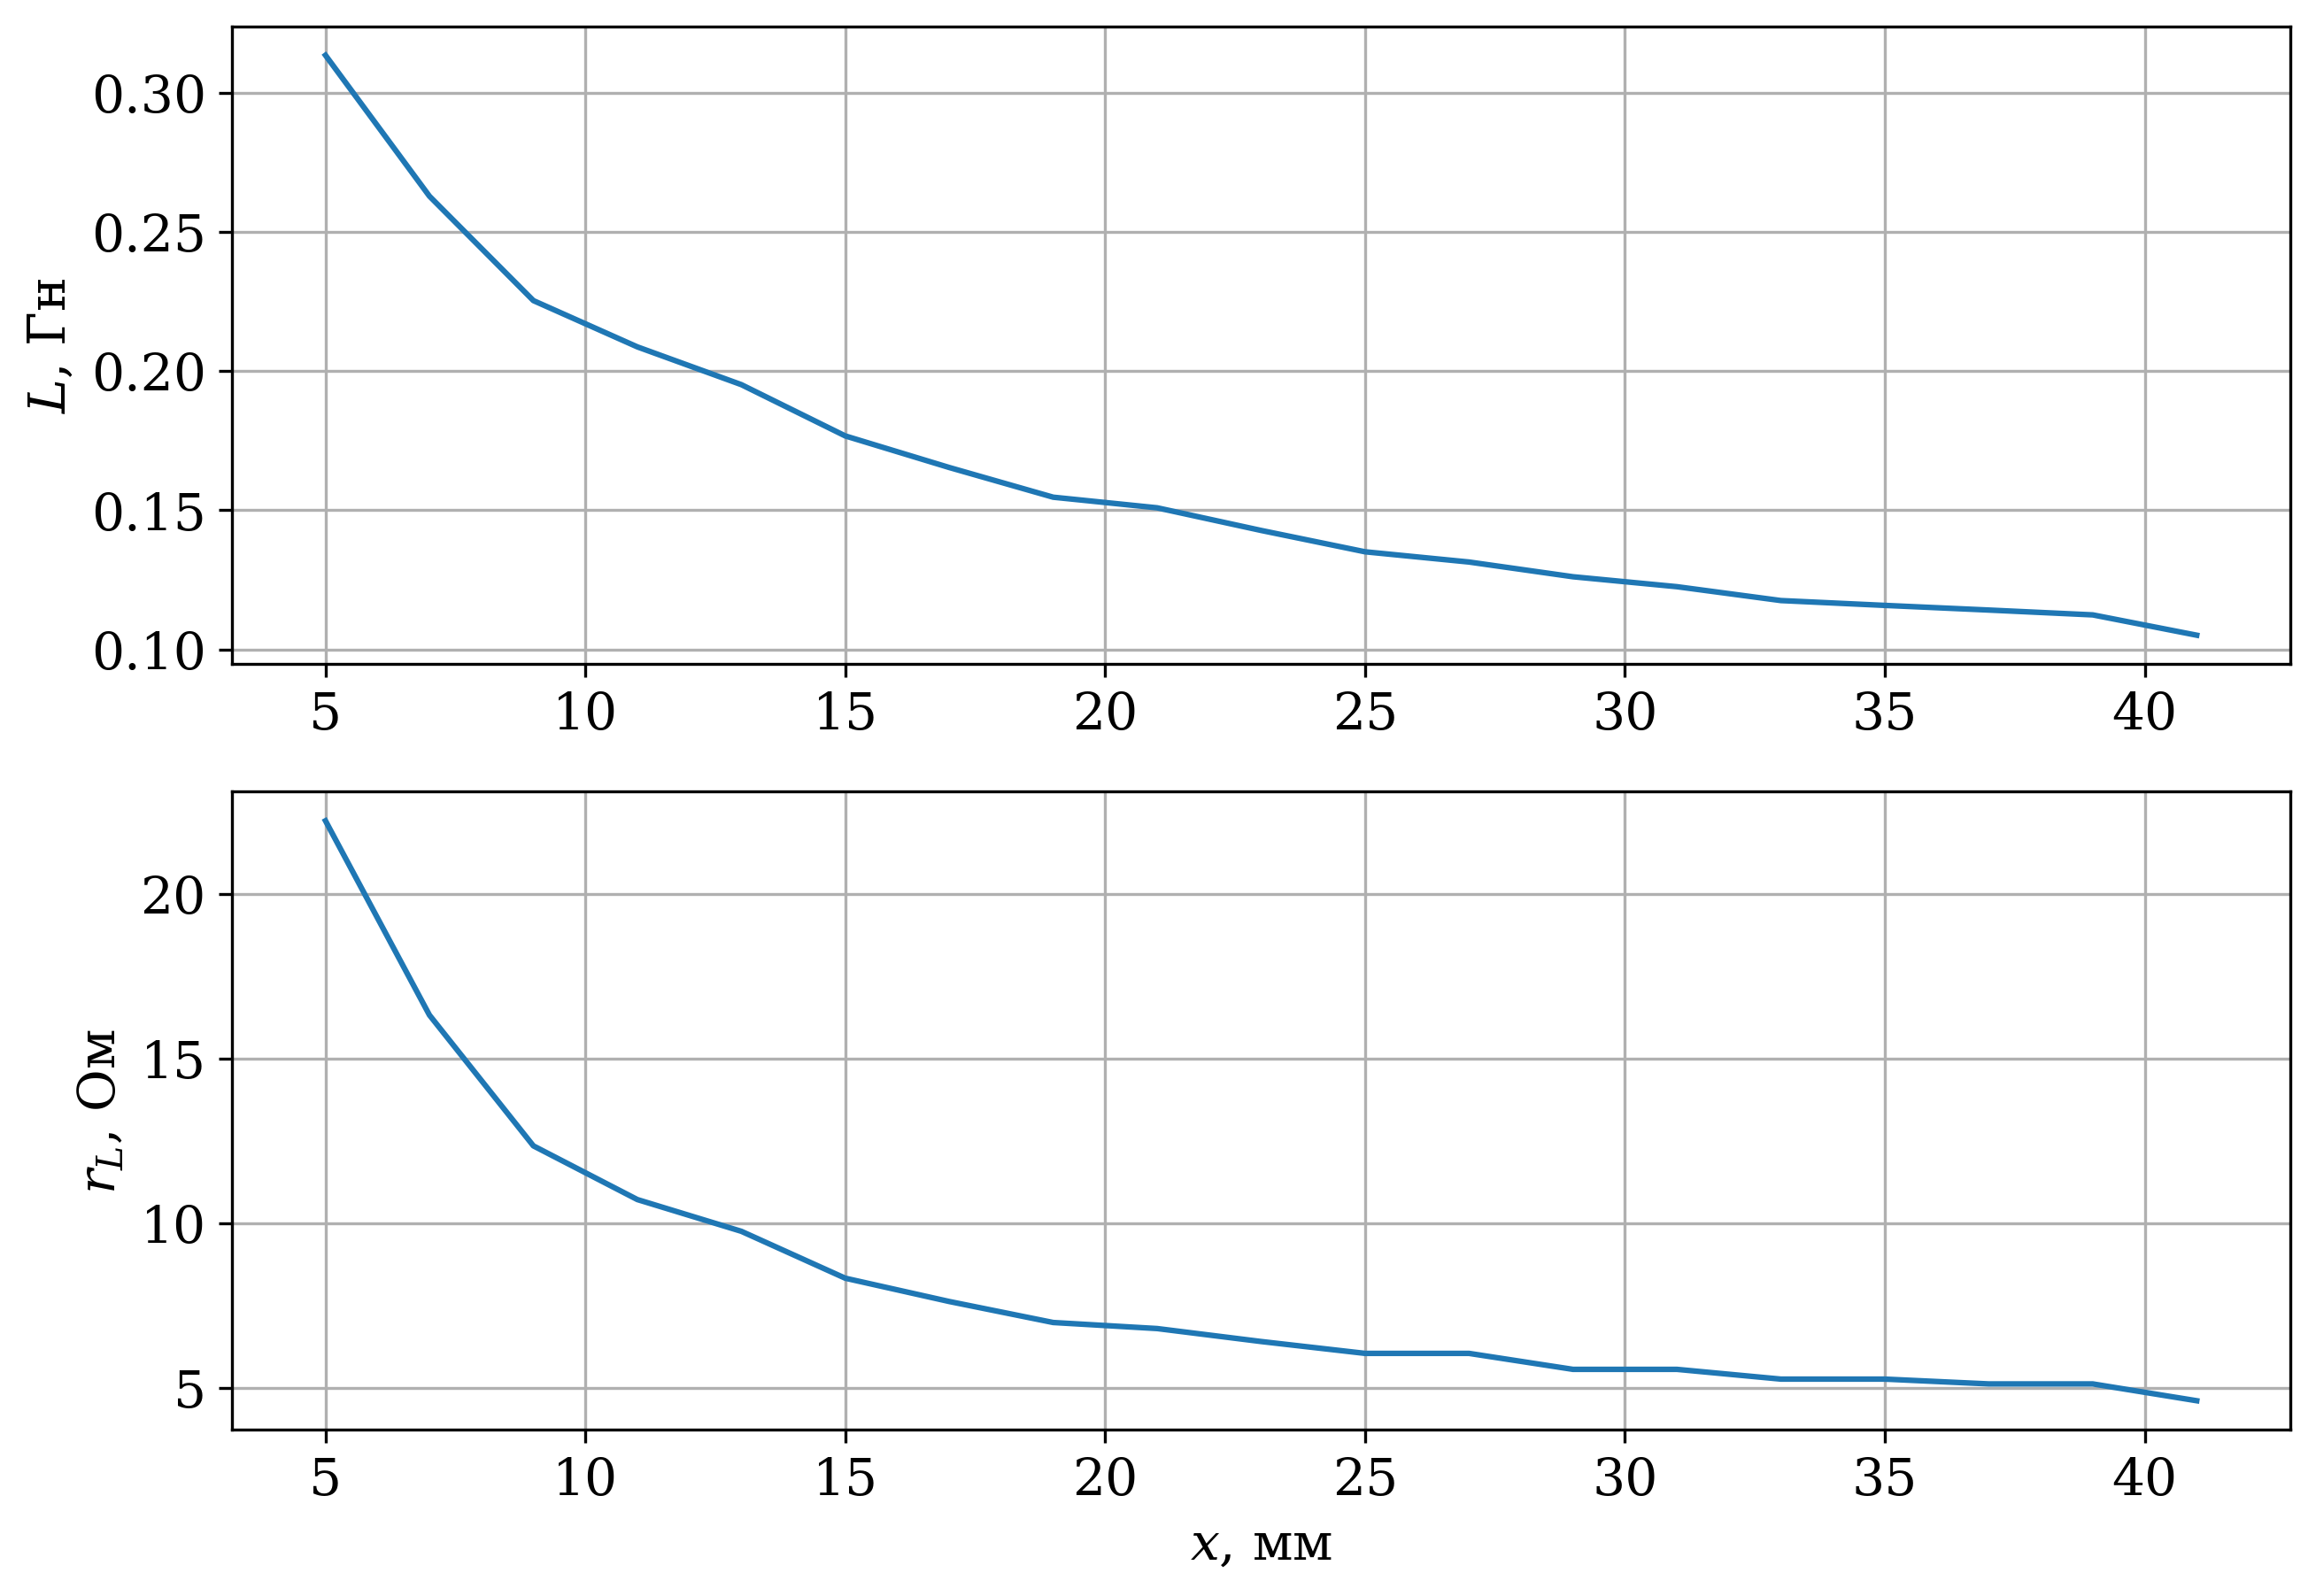

In [63]:
plt.subplot(211)
plt.plot(data.iloc[:, 0], data.iloc[:, 7])
plt.ylabel("$L$, Гн")

plt.subplot(212)
plt.plot(data.iloc[:, 0], data.iloc[:, 6])
plt.ylabel("$r_L$, Ом")



plt.xlabel("$x$, мм")
plt.savefig("plot1.png")